# PERKENALAN

Airbnb adalah jaringan pasar daring dan penginapan rumahan sejawat yang memungkinkan pengguna mendaftarkan atau menyewa properti untuk digunakan dalam jangka pendek. Harga sewanya ditetapkan oleh pemilik properti.

Dalam analisa ini kita akan spesifik ke airbnb yang ada di Bangkok

Disini saya sebagai analysis untuk memberikan masukan kepada investor yang ingin masuk ke dalam bisnis penyewaan tempat menginap di Thailand berdasarkan data Airbnb Bangkok

# ABSTRAK

Melalui analisis statistik deskriptif dan validasi pasar, analisis ini menemukan bahwa Distrik Parthum Wan, Samphanthawong, Vadhana, Bang Tak, Pom Prap Sattru Phai  merupakan pusat perputaran uang tertinggi, bukan distrik pinggiran yang tampak mahal namun tidak likuid. Temuan lain menunjukkan preferensi wisatawan yang kuat terhadap "Entire Home/Apt" (Apartemen Utuh) dibandingkan kamar hotel, serta adanya kesenjangan performa yang ekstrem di mana Host Profesional lebih tinggi dibandingkan host individual.

Laporan ini menyimpulkan bahwa kunci keberhasilan di Airbnb Bangkok bukan terletak pada perang harga, melainkan pada pemilihan lokasi premium yang tepat dan penerapan standar manajemen operasional profesional.

# LATAR BELAKANG

Bangkok merupakan salah satu kota yang paling banyak dikunjungi di dunia. Bangkitnya kembali pariwisata internasional memicu lonjakan pasokan listing di Airbnb. Namun, data awal menunjukkan adanya ketimpangan distribusi pendapatan yang mencolok:


1. Price War: Host pemula cenderung membanting harga untuk menarik tamu, namun data menunjukkan strategi ini tidak selalu efektif.

2. Kebingungan Investor: Tanpa data yang jelas, investor seringkali "terjebak" membeli properti di lokasi yang murah namun sepi peminat, atau membeli di lokasi mahal namun kalah saing dengan hotel.

Oleh karena itu, diperlukan analisis mendalam untuk memisahkan antara mitos pasar dan fakta data agar keputusan investasi dapat dilakukan dengan risiko yang terukur.

# RUMUSAN MASALAH

Berdasarkan latar belakang di atas, analisis ini difokuskan untuk menjawab empat pertanyaan strategis utama:

1. Analisis Lokasi: Di manakah lokasi premium yang sesungguhnya di Bangkok yang memiliki keseimbangan antara harga tinggi dan volume permintaan yang stabil ?

2. Analisis Produk: Tipe properti apa (Room Type) yang paling diminati oleh wisatawan saat ini? Apakah listing tipe "Hotel" masih relevan di platform Airbnb?

3. Analisis Kompetisi: Seberapa besar pengaruh profesionalitas host terhadap tingkat keberhasilan listing? Apakah host individual masih memiliki peluang?

4. Analisis Harga: Bagaimana profil ekonomi setiap distrik?

# BATASAN MASALAH

laporan ini memiliki batasan sebagai berikut:

1. Snapshot Data: Data yang digunakan adalah potret waktu tertentu , sehingga tren musiman jangka pendek mungkin tidak tertangkap sepenuhnya.

2. Fitur Harga: Harga yang dianalisis adalah harga tertera, belum termasuk biaya kebersihan atau negosiasi khusus.

# SUMBER DATA

Data ini didapatkan dari link berikut = [link](https://drive.google.com/file/d/1Kagt-IMGruvyBV3tH6HYa721JK-TN-56/view?usp=drive_link)

# IMPORT LIBRARIES

In [ ]:
#Library untuk pandas
import pandas as pd

#Library statistika
from scipy.stats import kstest , shapiro , normaltest
from statsmodels.stats.diagnostic import lilliefors

#Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk cleaning nama
import re

#Library penghilang warning (agar tampilan bersih)
import warnings


In [ ]:
#Mengaktifkan penghilang warning
warnings.filterwarnings('ignore')

# DATA UNDERSTANDING

## UPLOAD DATA

In [ ]:
data = pd.read_csv('airbnb.csv')
data

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## INFORMASI TIPE DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

| **NAMA KOLOM** | **PENJELASAN** |
|----------------|----------------|
| id | Airbnb unique identifikasi untuk listing |
| name | Nama listing |
| host_id | Airbnb unique identifikasi untuk pemilik |
| host_name | Nama dari Pemilik, hanya nama depan |
| Neighbourhood | Merupakan kota terdekat dari listing airbnb |
| latitude | Koordinat garis lintang |
| longitude | Koordinat garis bujur |
| room_type | Tipe room yang terdiri dari Entire home/apt, Private room, Shared room, Hotel |
| price | Harga per malam |
| minimum_nights | Minimum menginap di listing airbnb |
| number_of_reviews | Review listing airbnb |
| last_review | Tanggal review listing airbnb |
| reviews_per_month | Jumlah review listing airbnb setiap bulannya |
| calculated_host_listings_count | Jumlah listing yang dimiliiki oleh pemiliki di sekitar area tersebut|
| availability_365 | Jumlah ketersediaan kamar |
| number_of_reviews_ltm | Review listing airbnb dalam 12 bulan kebelakang |

dari data diatas ditemukan untuk data yang akan kita lakukan perubahan, yaitu :

1.   Kolom Unnamed : 0 merupakan kolom kosong, sehingga tidak perlu kita gunakan (hapus)
2.   kolom last_review type masih object harus diubah menjadi datetime

In [ ]:
data['room_type'].value_counts()

,count
room_type,
Entire home/apt,8912
Private room,5770
Hotel room,649
Shared room,523


## MENGUBAH TIPE DATA

### Kolom Last_Review

In [ ]:
data['last_review']

,last_review
0,2020-01-06
1,NaN
2,NaN
3,2022-04-01
4,NaN
...,...
15849,NaN
15850,NaN
15851,NaN
15852,NaN


dari kolom last review sudah terlihat bahwa format yang digunakan untuk tanggal nya adalah YYYY-MM-DD, namun masih tipe object, sehingga akan kita ganti type menjadi **datetime**

In [ ]:
data['last_review'] = pd.to_datetime(data['last_review'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15846 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_nights                  15854 non-null  int64         
 11  nu

Disini sudah di check bahwa untuk dtype last_review sudah berganti menjad datetime

## MENGHAPUS KOLOM UNNAMED : 0

In [ ]:
data = data.drop('Unnamed: 0',axis=1)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

Dari data info di atas, kita sudah mengetauhi bahwa kolom unnamed : 0 sudah hilang dari data yang akan kita olah

## MENCARI NILAI HILANG

In [ ]:
datahilang = data.isna().sum()
datahilang

,0
id,0
name,8
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [ ]:
type(datahilang)

pandas.core.series.Series

In [ ]:
datahilang.name = 'Total Data Hilang'
datahilang

,Total Data Hilang
id,0
name,8
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


Karena type masih series, maka kita rubah menjadi data frame

In [ ]:
datahilang = pd.DataFrame(datahilang)
type(datahilang)

pandas.core.frame.DataFrame

In [ ]:
datahilang

,Total Data Hilang
id,0
name,8
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


setelah sudah merubah menjadi dataframe, maka kita akan check jumlah presentasi data yang hilang :

In [ ]:
datahilang['%'] = (datahilang['Total Data Hilang'] / len(data)) * 100
datahilang = datahilang.sort_values(by='Total Data Hilang',ascending=False)
datahilang

,Total Data Hilang,%
reviews_per_month,5790,36.520752
last_review,5790,36.520752
name,8,0.050460
host_name,1,0.006308
neighbourhood,0,0.000000
latitude,0,0.000000
id,0,0.000000
host_id,0,0.000000
room_type,0,0.000000
longitude,0,0.000000


<Axes: >

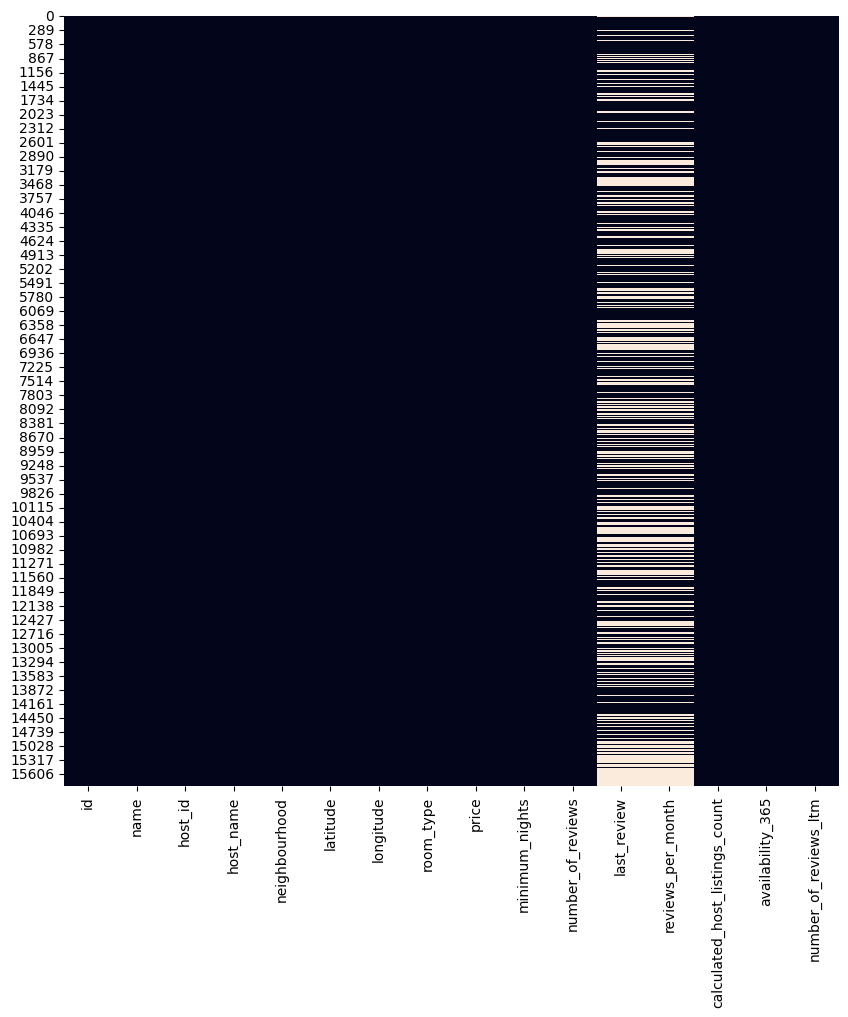

In [ ]:
# Mencari sebaran data hilang di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(data.isna(),cbar=False)

Dari data di atas, dapat kita simpulkan yaitu :

1.   terdapat 4 kolom yang memiliki data yang hilang, yaitu reviews_per_month, last_review, name, dan host_name dengan masing-masing % 36,5, 36,5, 0,05, dan 0,006
2.   nilai terbesar ada di review_per_month dan last_review, bisa diartikan bahwa listing airbnb tersebut belum pernah diulas. kolom tersebut merepresentasikan kolom ulasan/review
3. untuk name dan host_name ada data yg hilang namun tidak signifikan



## MENCARI NILAI DUPLIKAT

In [ ]:
data.duplicated().sum()

np.int64(0)

Dari hasil di atas, bahwa terlihat data listing airbnb tidak ada duplikat data

# EXPLORATORY DATA ANALYSIS

## NUMERIC VARIABLES

### DESSCRIPTIVE STATISTICS

In [ ]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.813145,13.889618,244.378643,3.481519
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937


karena kita akan fokus untuk kolom yang hanya merepresentasikan angka, maka kolom yang kita pakai yaitu :

1.   Price
2.   minimum_nights
3. number_of_reviews
4. reviews_per_month
5. calculated_host_listings_count
6. availability_365
7. number_of_reviews_ltm



In [ ]:
datanum = data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]
datanum.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Dari data di atas, kita melihat beberapa anomali  yaitu :


1.   kolom price, terlihat bahwa ada data listing airbnb min dengan harga 0, secara logika tidak mungkin tempat penginapan memiliki harga 0.
2.   kolom minimum_nights, terlihat bahwa nilai maksimumnya adalah 1125, secara logika tidak mungkin kita untuk menginap selama 1125 malam




#### KOLOM PRICE

In [ ]:
harga0 = data[data['price'].min() == data['price']]
harga0

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,NaN,1,0,0


terlihat di atas bahwa data yang memiliki data 0 hanya 1 saja, sehingga untuk data cleaning baris ini akan kita hapus karena tidak memiliki efek terhadap data yang akan kita analisa

#### KOLOM MINIMUM_NIGHTS

In [ ]:
malam = data[data['minimum_nights'].max() == data['minimum_nights']]
malam

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0


terlihat di atas bahwa data yamg memiliki minimal malam dengan lama 1125 malam hanya 1 saja. bisa jadi ini merupakan kesalahan input data.

### HISTOGRAM GRAPH

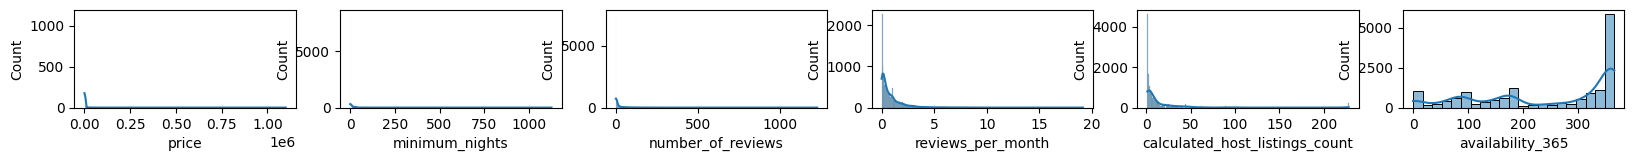

In [ ]:
datanum = data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

plt.figure(figsize=(20,15))
posisi = 1

for kolom in datanum.columns:
    plt.subplot(10,6, posisi)
    sns.histplot(datanum[kolom],kde = True)
    posisi += 1

plt.show()

### STATISTIKA TEST

In [ ]:
from scipy import stats
hasilstatistik = {
    'Test':['Nilai Hasil KSTEST','KSTEST', 'Nilai Hasil SHAPIRO','SHAPIRO', 'Nilai Hasil NORMALTEST','NORMALTEST','Nilai Hasil LILLIEFORS','LILLIEFORS'],
}

for kolom in datanum.columns:
  statskstest,pvaluekstest = kstest(datanum[kolom], 'norm')
  statsshapiro,pvalueshapiro = shapiro(datanum[kolom])
  statsnormaltest,pvaluenormaltest = normaltest(datanum[kolom])
  statslilliefors,pvalueslilliefors = lilliefors(datanum[kolom])

  if pvaluekstest > 0.05:
    hasilkstest = 'Distribusi Normal'
  else:
    hasilkstest = 'Distribusi Tidak Normal'
  if pvalueshapiro > 0.05:
    hasilshapiro = 'Distribusi Normal'
  else:
    hasilshapiro = 'Distribusi Tidak Normal'
  if pvaluenormaltest > 0.05:
    hasilnormaltest = 'Distribusi Normal'
  else:
    hasilnormaltest = 'Distribusi Tidak Normal'
  if pvalueslilliefors > 0.05:
    hasilliliefors = 'Distribusi Normal'
  else:
    hasilliliefors = 'Distribusi Tidak Normal'


  hasilstatistik[kolom] = [pvaluekstest, hasilkstest, pvalueshapiro, hasilshapiro, pvaluekstest, hasilnormaltest, pvalueslilliefors, hasilliliefors]

hasilstatistik = pd.DataFrame(hasilstatistik).set_index('Test').T
hasilstatistik

Test,Nilai Hasil KSTEST,KSTEST,Nilai Hasil SHAPIRO,SHAPIRO,Nilai Hasil NORMALTEST,NORMALTEST,Nilai Hasil LILLIEFORS,LILLIEFORS
price,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.001,Distribusi Tidak Normal
minimum_nights,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.001,Distribusi Tidak Normal
number_of_reviews,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.001,Distribusi Tidak Normal
reviews_per_month,NaN,Distribusi Tidak Normal,NaN,Distribusi Tidak Normal,NaN,Distribusi Tidak Normal,NaN,Distribusi Tidak Normal
calculated_host_listings_count,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.001,Distribusi Tidak Normal
availability_365,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.0,Distribusi Tidak Normal,0.001,Distribusi Tidak Normal


#### OUTLIERS

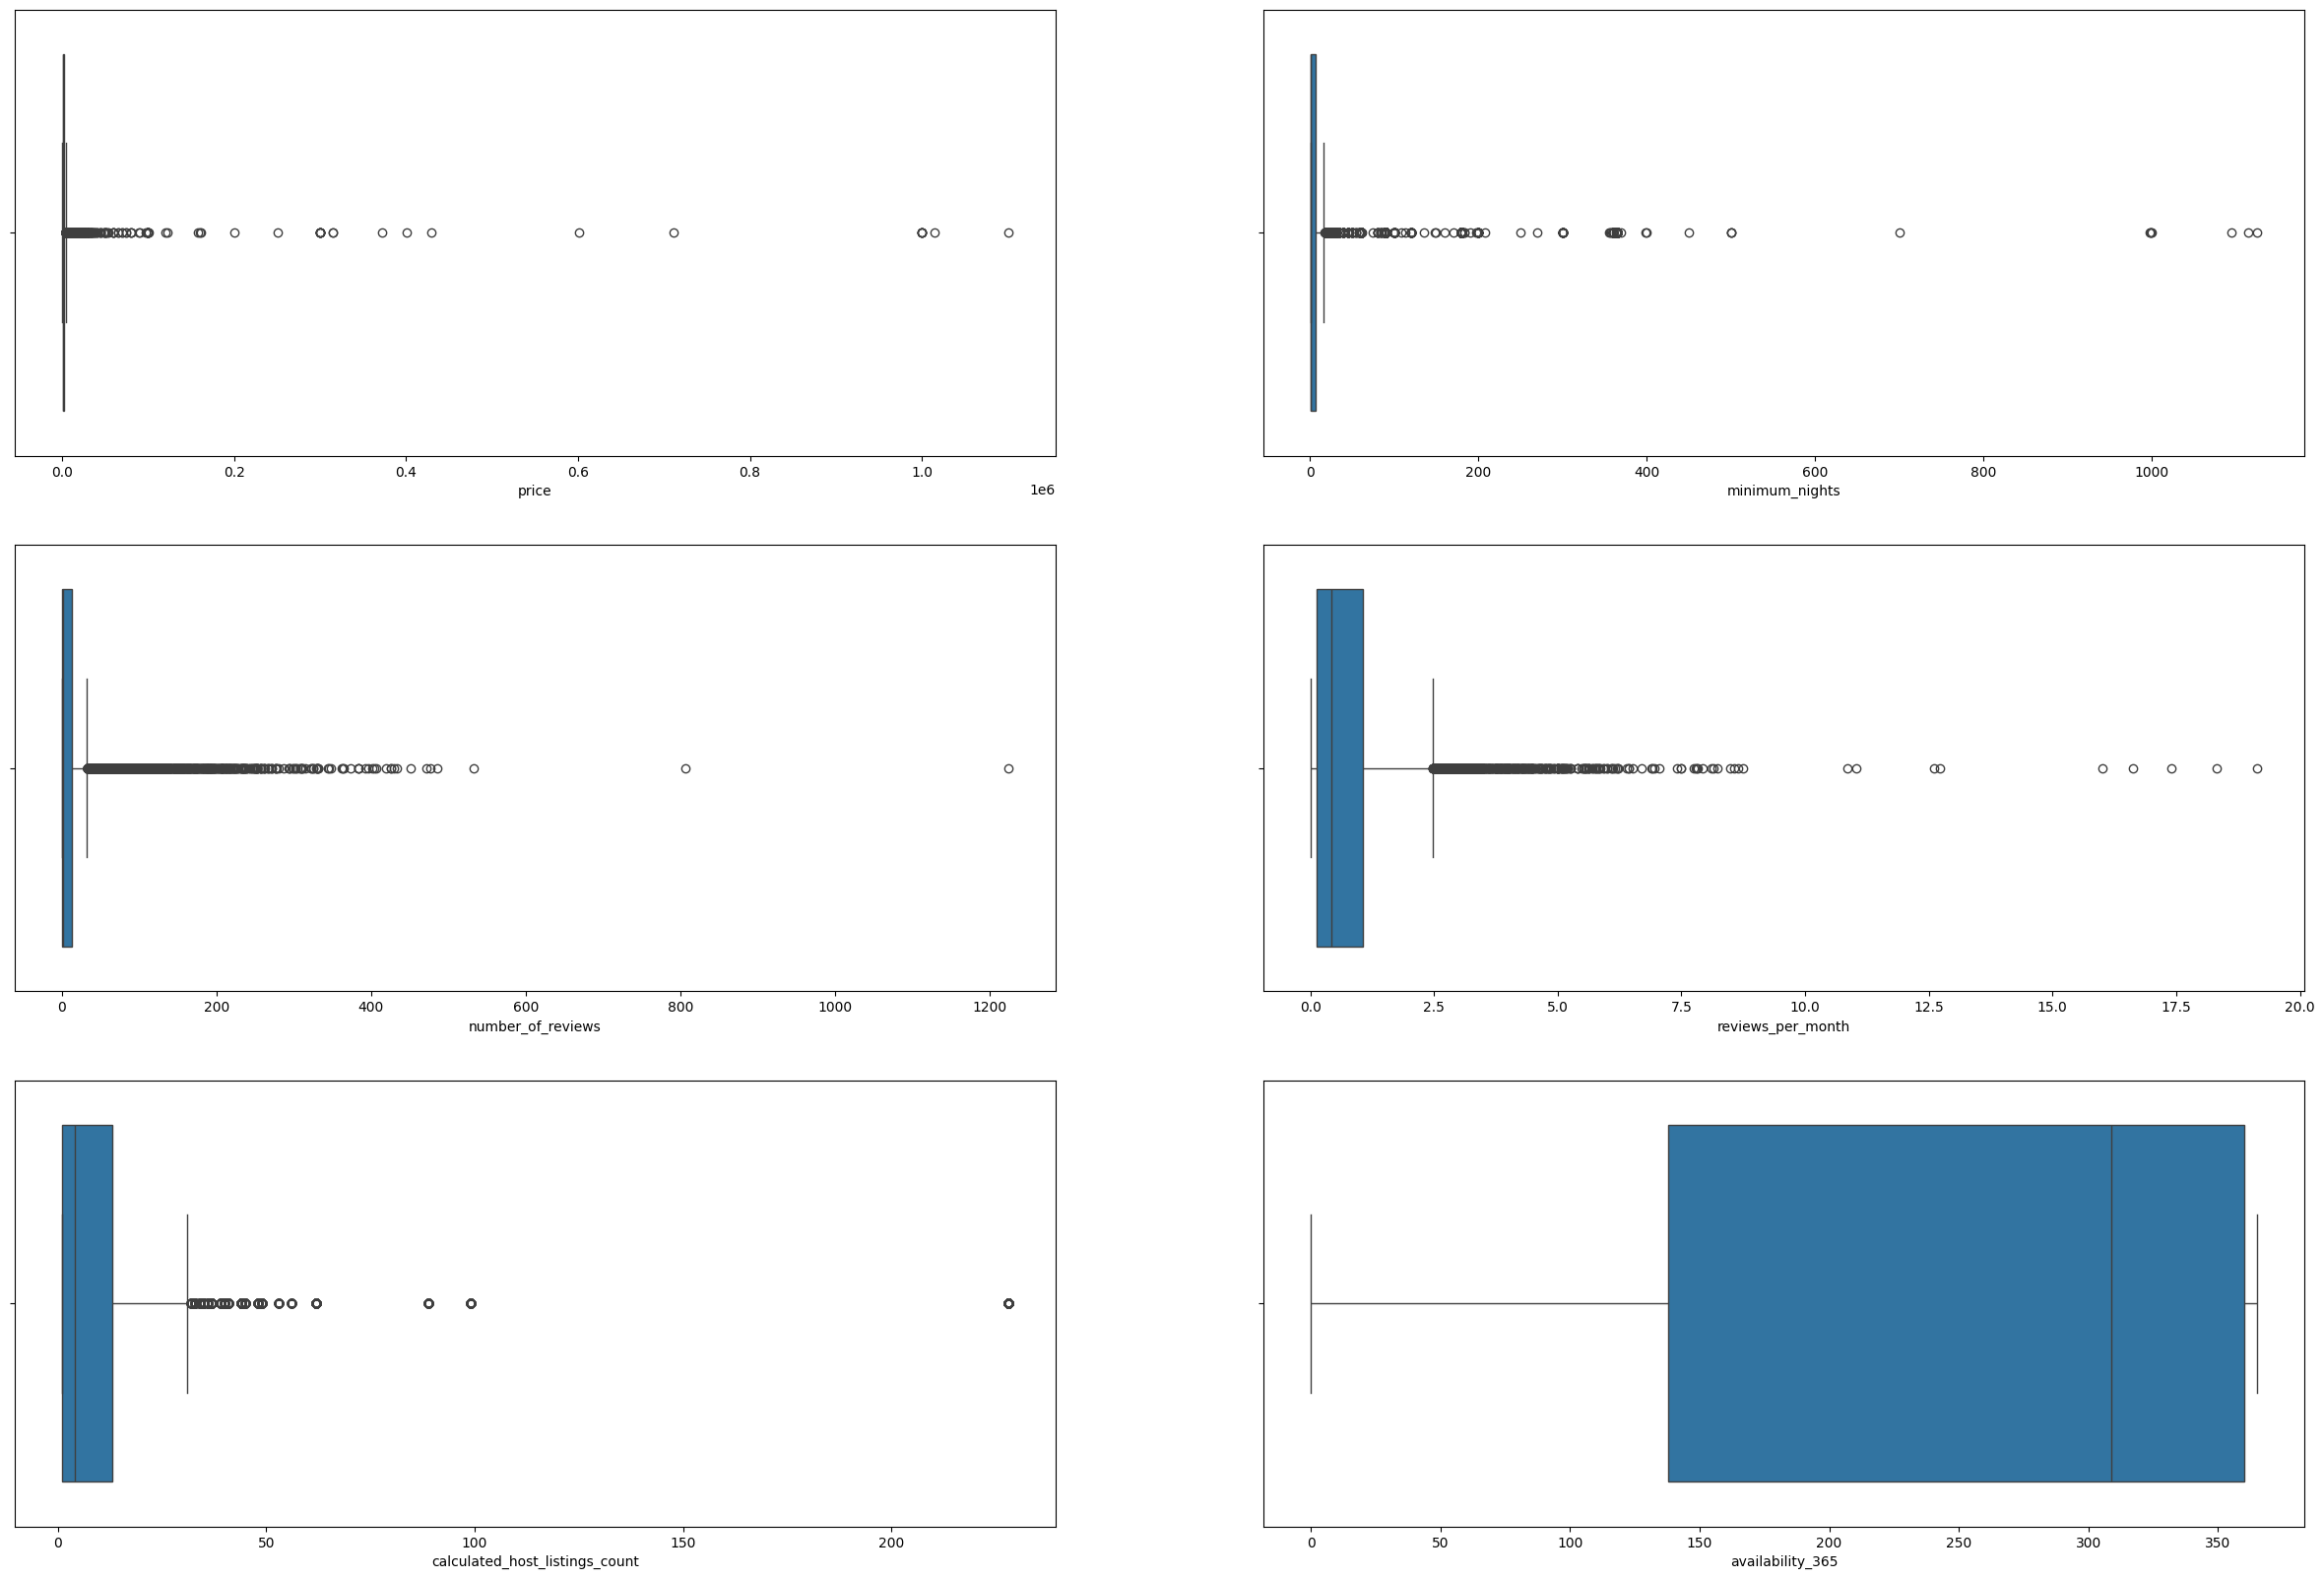

In [ ]:
plt.figure(figsize=(30,20))
posisi = 1

for kolom in datanum.columns:
  plt.subplot(3,2,posisi)
  sns.boxplot(x=datanum[kolom])
  posisi += 1

plt.show()

##### IQR

In [ ]:
datanum = data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
list_outliers_count = []

hasil = {}

for column in datanum.columns:
    q3 = datanum.describe().loc['75%', column]
    q1 = datanum.describe().loc['25%', column]
    iqr = q3 - q1
    whisker = 1.5 * iqr
    upper_bound = q3 + whisker
    lower_bound = q1 - whisker

    # Menghitungn outliners

    hasil[column] = {
        'q1': q1,
        'q3': q3,
        'iqr': iqr,
        'Batas_Atas': upper_bound,
        'Batas_Bawah': lower_bound
    }

    outliers_count = len(data[(data[column] > upper_bound) | (data[column] < lower_bound)])
    list_outliers_count.append(outliers_count)



outliers_data = pd.DataFrame({
    'Column': datanum.columns,
    'Outliers Count': list_outliers_count
})

In [ ]:
hasil_data = pd.DataFrame(hasil).T
hasil_data

,q1,q3,iqr,Batas_Atas,Batas_Bawah
price,900.00,2429.00,1529.00,4722.50,-1393.50
minimum_nights,1.00,7.00,6.00,16.00,-8.00
number_of_reviews,0.00,13.00,13.00,32.50,-19.50
reviews_per_month,0.12,1.06,0.94,2.47,-1.29
calculated_host_listings_count,1.00,13.00,12.00,31.00,-17.00
availability_365,138.00,360.00,222.00,693.00,-195.00


In [ ]:
outliers_data_sorted = outliers_data.sort_values(by='Outliers Count', ascending=False)
outliers_data_sorted

,Column,Outliers Count
1,minimum_nights,3168
2,number_of_reviews,2240
4,calculated_host_listings_count,1832
0,price,1403
3,reviews_per_month,693
5,availability_365,0


Dari data diatas terlihat dari kolom yang memiliki outliers terdiri dari minimum_nights, number_of_review, calculated_host_listings_count, price, review_per_mount, dan availability_365. Untuk itu karena kita akan fokus di price terlebih dahulu.

###### KOLOM PRICE

In [ ]:
price = data[data['price'] > 4723]
price

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0
18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,2020-01-07,1.08,1,334,0
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3
34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.722910,100.537590,Entire home/apt,5429,2,3,2018-12-18,0.03,3,174,0
48,185364,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.779000,100.836710,Entire home/apt,8658,1,0,NaT,NaN,1,363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,NaT,NaN,10,362,0
15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,NaT,NaN,10,362,0
15765,786834873763460489,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.735632,100.567862,Entire home/apt,7589,1,0,NaT,NaN,44,364,0
15766,786852847114140309,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.734753,100.566682,Entire home/apt,7589,1,0,NaT,NaN,44,364,0


Selanjutnya, kita ingin melihat outliers price berdasarkan tipe kamar lisiting

In [ ]:
hitung_iqr = data.groupby('room_type')['price'].apply(
    lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))
).reset_index(name='batas_atas')

data_gabung = data.merge(hitung_iqr, on='room_type')

data_outlier = data_gabung[data_gabung['price'] > data_gabung['batas_atas']]

jumlah_outlier = data_outlier['room_type'].value_counts()

jumlah_outlier

,count
room_type,
Entire home/apt,772
Private room,560
Shared room,69
Hotel room,49


terlihat dengan batas atas price sebesar 4.723, maka didapat outliners per masing-masing type =


1.   Tipe entire home/apt sebanyak 772 listing
2.   private room sebanyak 560 listing
3. shared room sebanyak 69 listing
4. hotel room 49 listing




Selanjutnya kita akan check terlebih dahulu harga lisitng di thailand pada di tahun data ini diambil, sehingga kita akan check rata2 tahun di last_review

In [ ]:
tahun_review = data['last_review'].dt.year.dropna()

rata_rata = tahun_review.mean()
rata_rata

np.float64(2020.9657193958665)

dari di atas, kita bisa menyimpulkan bahwa data listing airbnb ini berjalan di tahun 2021.

Berdasarkan data MaketMinder(AirDNA) dan laporan properti lokal untuk tahun 2021, bisa diklasifikasikan bahwa =

| **kategori** | **kisaran harga** |
|--------------|-------------------|
|low price | 320 - 1000 |  
|middle price | 1000 - 3200|
|high price | > 3200|

Tabel di atas dengan mata uang bath

Untuk harga tertinggi, khususnya entire room/apt yang masuknya kategorinya mewah maksimal diharga 35.000 bath



Dengan data diatas, ini akan mempermudah dalam proses cleansing dan melihat anomali price sesuai dengan data aktual di thailand

# DATA CLEANING

Sesuai dengan data understanding langkah yang akan kita lakukan dalam proses data cleaning ini adalah =



1.   Menghilangkan kolom unnamed :0 (sudah dihilangkan saat fase data understanding)
2.   Merubah tipe data last_reviwe menjadi datetime (sudah dihilangkan saat fase data understanding)
3. kolom price dimana nilai maksimal ada yang memiliki harga 0 dan outliners
4. kolom minimum_nights dimana nilai maksimal ada yang memiliki 1125 malam dan outliners lainnya  
5. pengisian nilai di kolom review_per_month dan last_review.
6. cleaning di kolom name dan host_name



## MENGHILANGKAN PRICE 0

In [ ]:
harga0 = data[data['price'] == 0].index
harga0

Index([11103], dtype='int64')

In [ ]:
data_clean = data.drop(harga0, axis=0)
data_clean

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Setelah melakukan cleaning kolom price 0, maka data yang awalnya 15854 data menjadi 15853

## OUTLIERS KOLOM PRICE

In [ ]:
price_outliners = data_clean[data_clean['price'] > 4723]
price_outliners

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0
18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,2020-01-07,1.08,1,334,0
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3
34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.722910,100.537590,Entire home/apt,5429,2,3,2018-12-18,0.03,3,174,0
48,185364,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.779000,100.836710,Entire home/apt,8658,1,0,NaT,NaN,1,363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,NaT,NaN,10,362,0
15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,NaT,NaN,10,362,0
15765,786834873763460489,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.735632,100.567862,Entire home/apt,7589,1,0,NaT,NaN,44,364,0
15766,786852847114140309,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.734753,100.566682,Entire home/apt,7589,1,0,NaT,NaN,44,364,0


dari data 1403 ini, akan kita kelompokan lagi mana yang memiliki melebihi batas maksimal aktual harga yaitu di atas 35000 bath

In [ ]:
price_anomali = data_clean[data_clean['price'] > 35000]
price_anomali

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0
393,4450156,"Stylish Apartment in Bangkok, MRT",23095883,Thanakrit,Huai Khwang,13.755950,100.567800,Entire home/apt,100000,365,0,NaT,NaN,1,365,0
866,6855235,HYDE Sukhumvit 13 Condomidium,35923444,Khunnee,Khlong Toei,13.739590,100.555220,Private room,45000,365,0,NaT,NaN,3,365,0
879,6874847,HYDE Sukhumvit Condominium,35923444,Khunnee,Vadhana,13.739380,100.557450,Entire home/apt,45000,180,0,NaT,NaN,3,365,0
1134,7625178,วิวล่า สิขลา,39999413,อัครพล,Vadhana,13.741590,100.579770,Private room,65000,399,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.790490,100.488160,Private room,400717,1,0,NaT,NaN,5,241,0
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,NaT,NaN,1,365,0
13300,661357146049226172,Admiral Suite RO- 1BR Suite with Balcony,98598351,Admiral Premier,Vadhana,13.741640,100.561550,Private room,250344,1,0,NaT,NaN,17,360,0
15200,766201549677186657,80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫,28589379,Lily,Khlong San,13.721270,100.495270,Entire home/apt,710760,12,0,NaT,NaN,1,313,0


Didapatkan bahwa ada 74 data yang memiliki harga di atas harga termahal aktual yang ada di thailand, sehingga untuk data ini akan kita hapus untuk membersihkan data yang akan kita analisa

In [ ]:
# Memastikan jumlah data awal yang akan dihapus (setelah price 0 dihapus juga)
len(data_clean)

15853

In [ ]:
data_clean1 = data_clean[data_clean['price'] <= 35000]
data_clean1

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Dengan data_clean1 , kita sudah memiliki data clean berdasarkan nilai kolom price yang tidak sesuai dengan kenyataan sebenarnya di lapangan dengan total data 15779 listing

## CLEANING BERDASARKAN KOLOM MINIMUM_NIGHTS

In [ ]:
malam365 = data_clean1[data_clean1['minimum_nights'] > 365]
malam365

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
324,2489610,NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium,12743033,Thanan,Khlong Toei,13.72699,100.56988,Entire home/apt,2043,370,23,2017-10-21,0.23,2,365,0
1200,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.66417,100.64955,Entire home/apt,35000,998,20,2022-10-30,0.26,7,365,5
1592,10709131,"34Fl 2, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81699,100.56292,Entire home/apt,760,700,61,2019-08-25,0.73,2,364,0
1833,12046101,Near BTS Onnut Convenience house,22676472,Kuan,Suanluang,13.71161,100.60344,Entire home/apt,1300,500,2,2016-07-30,0.02,3,363,0
3694,19893829,2 Bedroom Suite@Kirthana Residence,64131143,Chetna,Vadhana,13.73917,100.56616,Entire home/apt,7286,500,0,NaT,NaN,3,48,0
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,NaT,NaN,2,358,0
8608,37270784,นพกรณ์ แมนชั่น Noppakorn Mansion,271222372,Noppakorn,Lat Phrao,13.81852,100.59248,Entire home/apt,450,450,0,NaT,NaN,1,364,0
10153,41623113,blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasa...,162537040,Songnya,Sathon,13.71195,100.52055,Entire home/apt,650,1000,2,2020-03-08,0.06,13,179,0
10644,42685153,The Prime Sukhumvit 11 - Room 29/150,337709866,Vatiaz,Vadhana,13.74426,100.55758,Private room,15143,999,0,NaT,NaN,1,89,0


In [ ]:
print(len(malam365))

13


Dari data di atas, terlihat bahwa untuk data yang memiliki minimum_nights melebihi 365 hari sebanyak 13 data. secara kenyataan untuk tipe selain entire home/apt masih memungkinkan untuk bisa 365 hari, namun tidak untuk tipe yang lain, sehingga untuk data yang melebihi 365 hari bisa dihapus.

In [ ]:
data_clean2 = data_clean1[data_clean1['minimum_nights'] <= 365]
data_clean2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


selanjutnya kita coba check untuk yg dibawah 365 terutama selain entire home/apt

In [ ]:
data_clean2['room_type'].value_counts()

,count
room_type,
Entire home/apt,8866
Private room,5730
Hotel room,647
Shared room,523


## PENGISIAN REVIEW_PER_MONTH DAN LAST_REVIEW

Selanjutnya untuk missing data di kolom review_per_month dan last_review akan kita isi sesuai dengan kebutuhan kolom yaitu =

1.   reviews_per_month data yang kosong akan kita ganti menjadi 0, ini akan mempermudah dalam perhitungan di tableau
2.   last_review data yang kosong tetap akan kita menggunakan NaT yang sudah terisi di data



In [ ]:
# perubahan ke 0 untuk data kosong di review_per_months

data_clean2['reviews_per_month'] = data_clean2['reviews_per_month'].fillna(0)

data_clean2['number_of_reviews'].value_counts()

,count
number_of_reviews,
0,5745
1,1736
2,941
3,675
4,502
...,...
244,1
406,1
807,1


Terlihat bahwa untuk data hilang (NaN) sudah berganti menjadi angka 0 untuk mempermudah proses perhitungan di tableau nanti

## CLEANING NAME & HOST_NAME

Fungsi pembersihan ini adalah untuk melaukan cleaning nama dan host name yang memiliki nama uniqe dan tidak teratur, sehingga kita akan bersihkan untuk mempermudah penampilan data

In [ ]:
# fungsi untuk menghapus name yang kosong
data_clean3 = data_clean2.dropna(subset=['name']).copy()

# fungsi untuk merubah kolom ke dalam string
data_clean3['name'] = data_clean3['name'].astype(str)

# fungsi untuk menghapus spasi di depan/belang
data_clean3['name'] = data_clean3['name'].str.strip()

# fungsi untuk merapikan kapital nama
data_clean3['name'] = data_clean3['name'].str.title()

# fungsi untuk menghapus kata emoji dan lainnya
def hapus_emoji(teks):
    hasil = re.sub(r'[^\w\s]', '', teks)

    hasil = re.sub(r'\s+', ' ', hasil).strip() #fungsi untuk menghapus spasi hasil dari pengahapusan di atas
    return hasil

data_clean3['name'] = data_clean3['name'].apply(hapus_emoji)

Mari kita check di data yang baru

In [ ]:
data_clean3['name'].value_counts()

,count
name,
1Br Twin Suit 2PplSurasak Bts SathornPool Wifi,51
New La Chada Night Market Studio 2Ppl Near Mrt,48
30Days Airportlink Sukhumvit Nana Maxvalu 2Br4P,35
New La Chada Night Market 1Br 2Ppl Near Mrt,35
New Gateway Bangkok University 1Br 2Ppl Near Bts,29
...,...
Eliodelray,1
Close To Jj Market Bts And Mrt 231 Sqm 中文服务,1
3Bedroom 220M2 Apartment Near Emporium Complex,1


In [ ]:
len(data_clean3)

15758

Dari hasil di atas, didapakan data clean terakhir setelah membersihkan nama sebanyak 15758 data yang next akan kita lakukan analisa

# FEATURE ENGINEERING

Di feature engineering ini, kita akan menambahkan kolom untuk menambahkan insight lebih dalam yaitu =



1.   price_group berfungsi untuk mengkalsifikasikan listing yang sudah ada untuk mendapatkan informasi mengenai kategori listing yang ada di aribnb
2. host_category berfungsi untuk melihat apakah host memiliki listing yang lain dengan kategori sebagai professional host atau hanya individu host


In [ ]:
def price_group(price):
    if price <= 1000:
      return 'Low Budget'
    if price <= 3200:
      return 'Middle Budget'
    else:
      return 'High Budget'

data_clean3['price_group'] = data_clean3['price'].apply(price_group)
data_clean3

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_group
0,27934,Nice Room With Superb City View,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Middle Budget
1,27979,Easy Going LandlordEasy Place,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0,Middle Budget
2,28745,ModernStyle Apartment In Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0,Low Budget
3,35780,Spacious One Bedroom At The Kris Condo Bldg 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Middle Budget
4,941865,Suite Room 3 At Metropoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0,Middle Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼靠近Btson Nut无边天际泳池观赏曼谷夜景出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0,Middle Budget
15850,790474503157243541,Euro Luxuryhotel Pratunammkt Triplebdnrshoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0,Middle Budget
15851,790475335086864240,Euro Luxuryhotel Pratunammkt Twinbednrshopingarea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0,Middle Budget
15852,790475546213717328,Euro Luxuryhotel Pratunammkt Twinbednrshopingarea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0,Middle Budget


In [ ]:
data_clean3['price_group'].value_counts()

,count
price_group,
Middle Budget,8132
Low Budget,5127
High Budget,2499


In [ ]:
def host_category(calculated_host_listings_count):
    if calculated_host_listings_count == 1:
      return 'Individual'
    else:
      return 'Professional'

data_clean3['host_category'] = data_clean3['calculated_host_listings_count'].apply(host_category)

In [ ]:
data_clean3['host_category'].value_counts()

,count
host_category,
Professional,11197
Individual,4561


# DATA ANALYSIS

Setelah data clean sudah kita dapatkan, makan next kita akan fokus untuk mencari tau bagaimana karateristik harga listing airbnb di thailand dibandingkan dengan kota disekitarnya.

## MAPPING LOKASI

In [ ]:
populasi_area = data_clean3['neighbourhood'].value_counts()
area_valid = populasi_area[populasi_area > 50].index
data_valid = data_clean3[data_clean3['neighbourhood'].isin(area_valid)]
data_valid

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_group,host_category
0,27934,Nice Room With Superb City View,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Middle Budget,Professional
1,27979,Easy Going LandlordEasy Place,120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0,Middle Budget,Professional
2,28745,ModernStyle Apartment In Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0,Low Budget,Individual
3,35780,Spacious One Bedroom At The Kris Condo Bldg 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Middle Budget,Individual
4,941865,Suite Room 3 At Metropoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0,Middle Budget,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼靠近Btson Nut无边天际泳池观赏曼谷夜景出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0,Middle Budget,Individual
15850,790474503157243541,Euro Luxuryhotel Pratunammkt Triplebdnrshoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0,Middle Budget,Professional
15851,790475335086864240,Euro Luxuryhotel Pratunammkt Twinbednrshopingarea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0,Middle Budget,Professional
15852,790475546213717328,Euro Luxuryhotel Pratunammkt Twinbednrshopingarea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0,Middle Budget,Professional


In [ ]:
top_lokasi = data_valid.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(5)
top_lokasi

,price
neighbourhood,
Parthum Wan,2365.0
Samphanthawong,2000.0
Vadhana,1984.5
Bang Rak,1848.0
Pom Prap Sattru Phai,1709.0


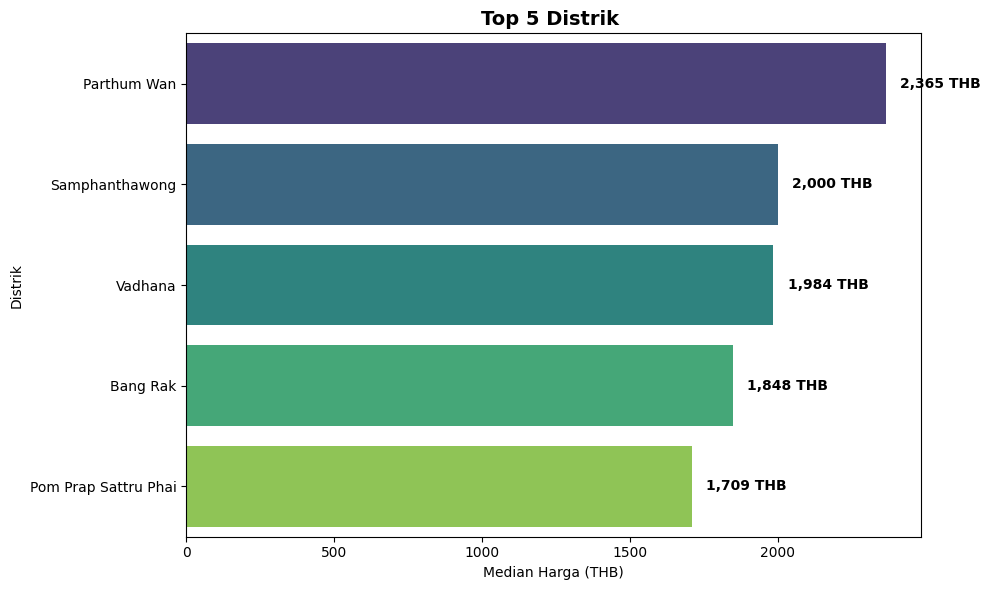

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_lokasi.values, y=top_lokasi.index, palette='viridis')

plt.title('Top 5 Distrik ', fontsize=14, fontweight='bold')
plt.xlabel('Median Harga (THB)')
plt.ylabel('Distrik')

# Label Angka
for i, v in enumerate(top_lokasi.values):
    ax.text(v + 50, i, f'{int(v):,} THB', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Dari data diatas kita dapat menyimpulkan bahwa 5 terbesar untuk kota yang disekitarnya memiliki listing terbanyak dengan indikasi median harga yaitu =

1.   Parthum Wan dengan nilai median 2365 bath
2.   Samphanthawong dengan nilai median 2000 bath
3. Vadhana dengan nilai median 1984 bath
4. Bang Tak dengan nilai median 1848 bath
5. Pom Prap Sattru Phai dengan nilai median 1709 bath



## PERSEBARAN SESUAI DENGAN ROOM TYPE

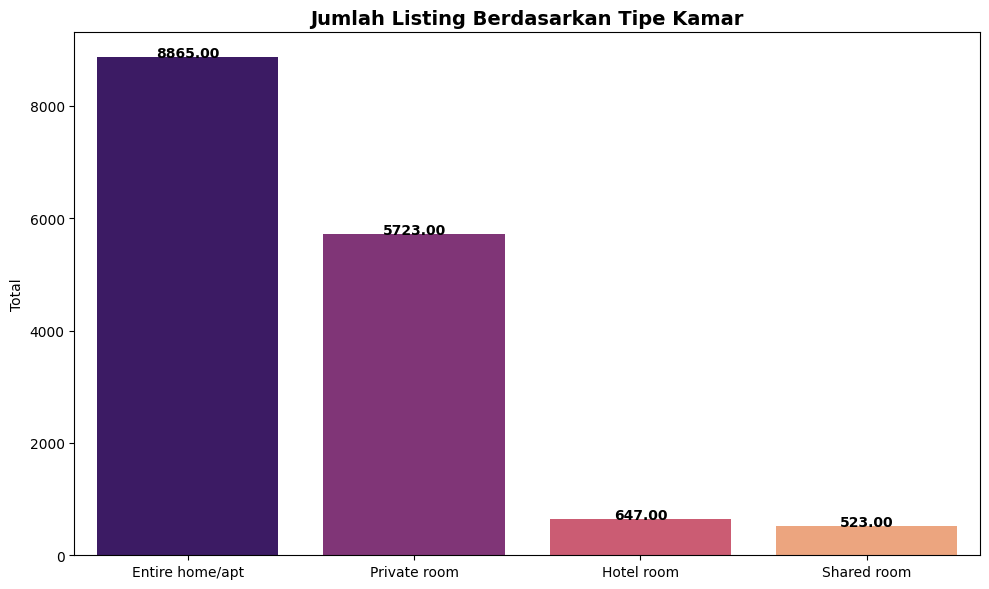

In [ ]:
plt.figure(figsize=(10, 6))

demand = data_clean3['room_type'].value_counts(ascending=False)

ax = sns.barplot(x=demand.index, y=demand.values, palette='magma')
plt.title('Jumlah Listing Berdasarkan Tipe Kamar', fontsize=14, fontweight='bold')
plt.ylabel('Total')
plt.xlabel('')

for i, v in enumerate(demand.values):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Dari data diatas kita bisa melihat bahwa sebagia besar pemilik listing masih condong untuk menawarkan entire home/apt dengan nilai 8865 unit kepada customer sebagai pilihan tempat tinggal mereka untuk tinggal selama di thailand. disusul dengan private room sebanyak 5723 unit

## PERSEBARAN PEMAIN LISITNG DI BANGKOK

<Figure size 1400x800 with 0 Axes>

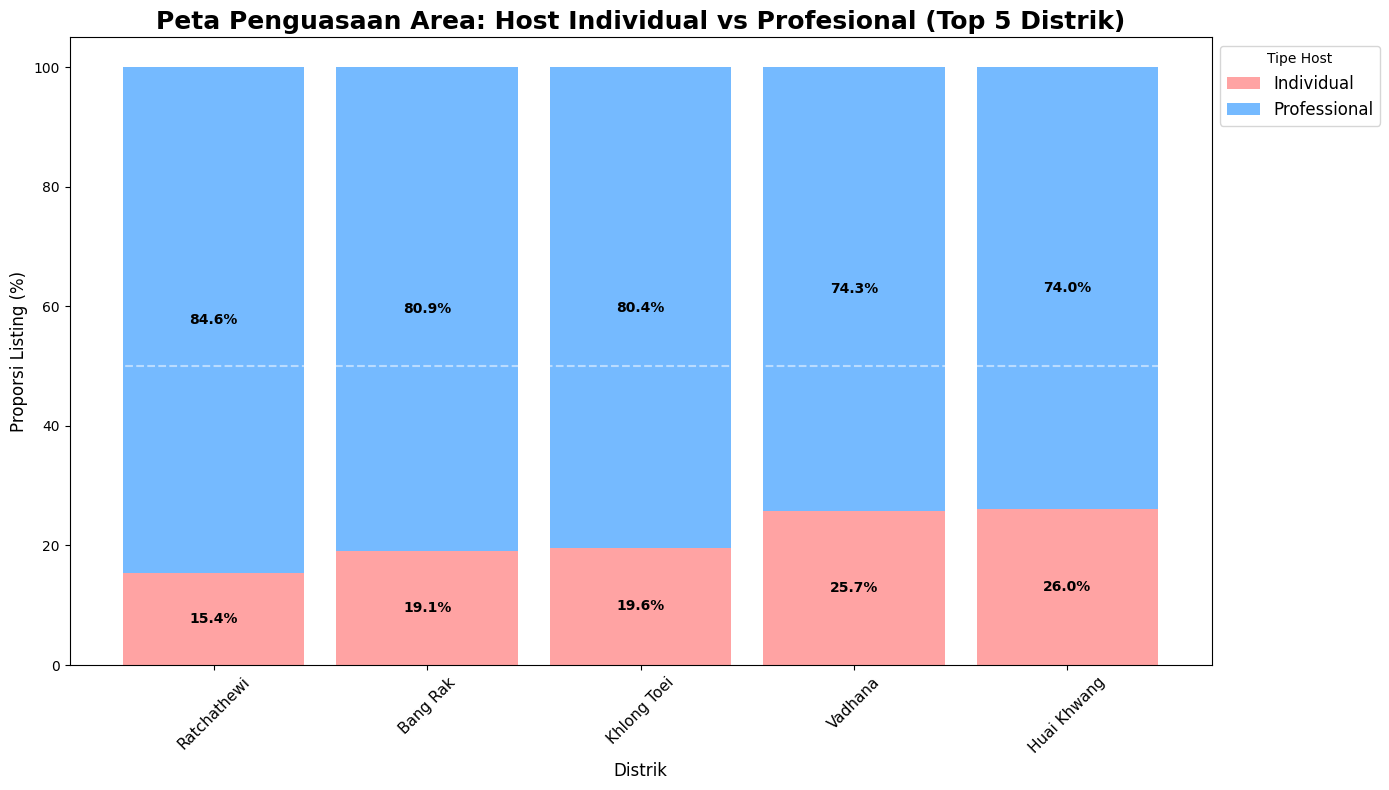

In [ ]:
# Filter untuk mengambil top 5 distrik yang sudah kita analisa pertama
top_5_districts = data_clean3['neighbourhood'].value_counts().head(5).index
data_top = data_clean3[data_clean3['neighbourhood'].isin(top_5_districts)]

host_dist = pd.crosstab(data_top['neighbourhood'], data_top['host_category'], normalize='index') * 100
host_dist = host_dist.sort_values('Professional', ascending=False)

# Grafik
plt.figure(figsize=(14, 8))
colors = ['#ff9999', '#66b3ff']
ax = host_dist.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), width=0.85, alpha=0.9)
plt.title('Peta Penguasaan Area: Host Individual vs Profesional (Top 5 Distrik)', fontsize=18, fontweight='bold')
plt.xlabel('Distrik', fontsize=12)
plt.ylabel('Proporsi Listing (%)', fontsize=12)
plt.legend(title='Tipe Host', bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.axhline(y=50, color='white', linestyle='--', alpha=0.5)

for c in ax.containers:
  labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]

  ax.bar_label(c, labels=labels, label_type='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()
# plt.savefig('Chart_Host_vs_Neighbourhood.png'

dilihat dari data di atas, diketahui bahwa presentase terbanyak yang di distrik nya didominasi oleh profesional adalah rachathewi, dimana memang daerah tersebut merupakan area perkotaan yang didominasi oleh gedung2 minimal 2 lantai yang bisa digunakan sebagai host

## PERBANDINGAN price_group DENGAN neighbourhood

<Figure size 1400x800 with 0 Axes>

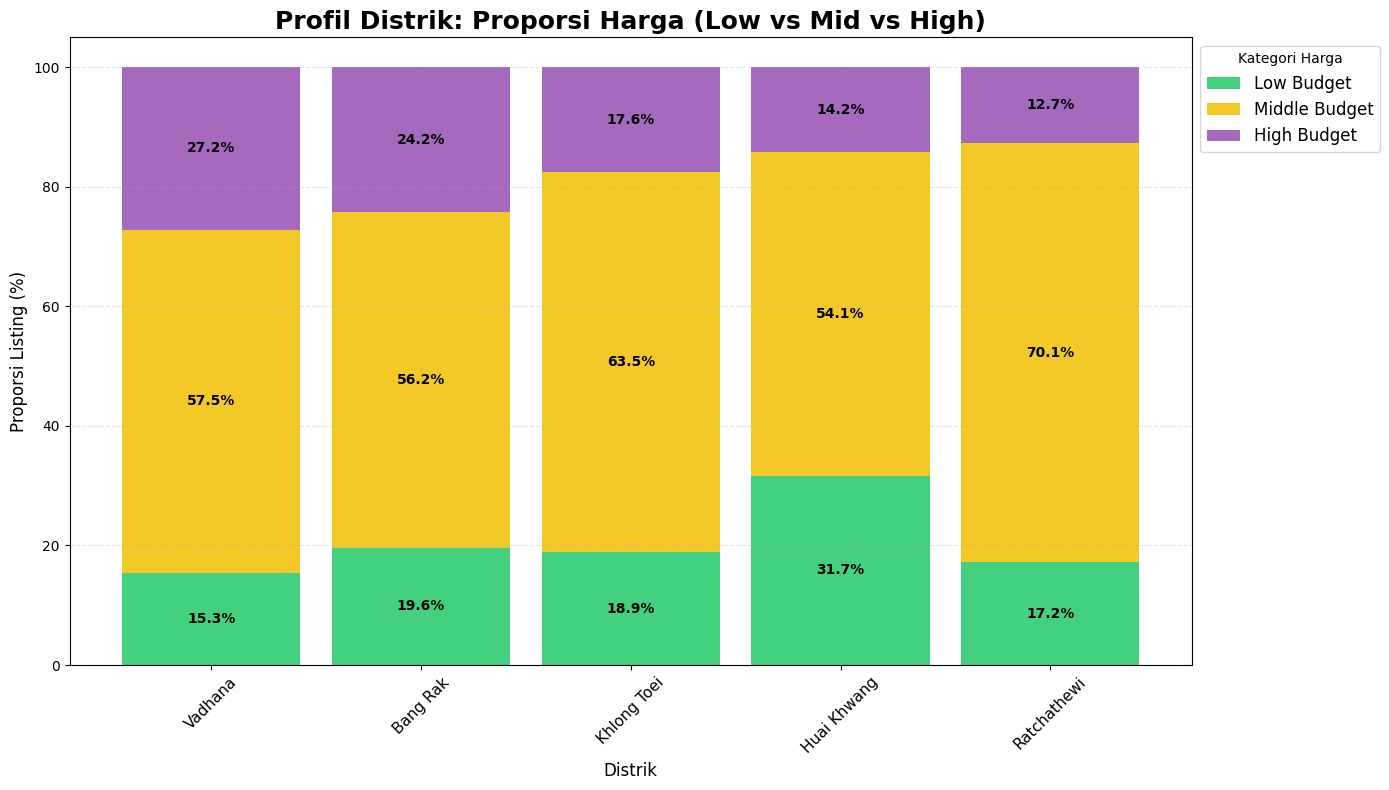

In [ ]:
# Filter untuk mengambil top 5 distrik yang sudah kita analisa pertama
top_5_districts = data_clean3['neighbourhood'].value_counts().head(5).index
data_top = data_clean3[data_clean3['neighbourhood'].isin(top_5_districts)]

# Filter jumlah listing berdasarkan host category
cross_tab = pd.crosstab(data_top['neighbourhood'], data_top['price_group'], normalize='index') * 100
cross_tab = cross_tab.sort_values('High Budget', ascending=False)
column_order = ['Low Budget', 'Middle Budget', 'High Budget']
cross_tab = cross_tab[column_order]

# Grafik Bar Chart
plt.figure(figsize=(14, 8))
colors = ['#2ecc71', '#f1c40f', '#9b59b6']
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), width=0.85, alpha=0.9)
plt.title('Profil Distrik: Proporsi Harga (Low vs Mid vs High)', fontsize=18, fontweight='bold')
plt.xlabel('Distrik', fontsize=12)
plt.ylabel('Proporsi Listing (%)', fontsize=12)
plt.legend(title='Kategori Harga', bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]

    ax.bar_label(c, labels=labels, label_type='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()
# plt.savefig('Chart_Price_vs_Neighbourhood.png')

Dari grafik di atas, terlihat bahwa dominasi middle budget masih menjadi primadona di setiap distrik yang menawarka harga yang tidak terlalu mahal begitu juga tidak terlalu murah, sehingga pengunjung bisa menikmati distrik dengan harga yang pas.

# KESIMPULAN ANALYSIS

Dari 4 grafik di atas, ada beberapak kesimpulan yang bisa kita ambil, yaitu =



1.   Pathwan menjadi distrik yang memiliki rata-rata tertinggi sebesar 2365 bath, ini menjadi indikasi range harga di distrik tersebeut masuk ke dalam range middle price.
2.   Pemilik listing masih condong untuk menawarkan entire home/apt dengan nilai 8865 unit kepada customer sebagai pilihan tempat tinggal mereka selama di thailand
3.  Kita melihat bahwa Distrik 5 teratas sudah terindustrialisasi sangat tinggi dengan didominasi Profesional. Bagi pemain baru bermodal kecil atau inidividu sudah sangat susah untuk bisa masuk kedalamnya
4. Dominasi middle price masih menjadi primadona dalam listing ini, namun seperti di daerah huai khwang, potensi di area kota dengan low price dengan presentasi 31,7 % bisa dilakukan follow up



# SARAN BISNIS



1.   Alokasikan Modal untuk membeli unit private room sebagai rencana jangka panjang, dimana pertumubuhan private room termasuk baik (2 tertinggi). potensi private room yang bisa masuk di area kota dan juga pinggiran bisa menyesuaikan dengan karateristik dan harga di masing-masing daerah untuk bersaing
2.   Pastikan harga yang ditawarkan masuk ke dalam middle price, sesuai dengan hasil grafik dominasi masih menggunakan middle price. sehingga untuk bisa bersaing dengan lisitng yang lain harus memberikan pengalaman yang baik dan memiliki fasilitas yang memadai dari listing-listing yang lain.



In [ ]:
# from google.colab import files

# data_clean3.to_csv('Airbnb_Bangkok_Clean_Final.csv', index=False, encoding='utf-8')

# files.download('Airbnb_Bangkok_Clean_Final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>